In [37]:
%load_ext autoreload
%autoreload 2

import pandas as pd
from sklearn.metrics import classification_report
from mlcm import mlcm
import numpy as np
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from defi_textmine_2025.method2.data.relation_and_entity_classes import (
    NO_RELATION_CLASS,
    REDUCED_TAGGED_TEXT_COL,
    RELATION_CLASSES,
    WITH_RELATION_CLASS,
)
from defi_textmine_2025.method2.models.shared_toolbox import load_fold_data, ORDERED_CLASSES
from defi_textmine_2025.method2.data.loading import load_data
from defi_textmine_2025.method2.evaluation.confusion_matrix import confusion_matrix

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [21]:
train_df, val_df = load_fold_data(1)

In [22]:
val_df.index

Index([     3,      6,     12,     14,     17,     23,     25,     26,     32,
           34,
       ...
       121999, 122012, 122014, 122023, 122024, 122026, 122031, 122035, 122036,
       122043],
      dtype='int64', length=24409)

In [23]:
val2_df = load_data("data/defi-text-mine-2025/interim/method2-5_fold_cv/validation-fold1-mth2.parquet")

In [24]:
val2_df.index

Index([     3,      6,     12,     14,     17,     23,     25,     26,     32,
           34,
       ...
       121999, 122012, 122014, 122023, 122024, 122026, 122031, 122035, 122036,
       122043],
      dtype='int64', length=24409)

# Load data

In [25]:
val_true_df = pd.read_parquet("data/defi-text-mine-2025/interim/method2-5_fold_cv/validation-fold1-mth2.parquet").assign(**{WITH_RELATION_CLASS: lambda df: 1 - df[NO_RELATION_CLASS]})
val_pred_df = load_data("data/defi-text-mine-2025/output/method2-cv5/fold1/validation-fold1-mth2.parquet_pred-after-filtering.csv", index_col=0).fillna(0).sort_index()

val_pred_df.head(2)

,text_index,e1_id,e2_id,e1_type,e2_type,text,relations,reduced_text,#WITH_RELATION,#NO_RELATION,...,IS_AT_ODDS_WITH,IS_BORN_IN,IS_COOPERATING_WITH,IS_IN_CONTACT_WITH,IS_LOCATED_IN,IS_PART_OF,OPERATES_IN,RESIDES_IN,STARTED_IN,START_DATE
3,2576,0,2,GATHERING,CBRN_EVENT,"Le matin du 10 janvier 2010, Arthur et Jacques...",['HAS_CONSEQUENCE'],"Au milieu de l’{ interview }, un incendie est ...",0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,2576,3,0,CIVILIAN,GATHERING,"Le matin du 10 janvier 2010, { Arthur } et Jac...",0.0,"Le matin du 10 janvier 2010, { Arthur } et Jac...",1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
train_true_df = pd.read_parquet("data/defi-text-mine-2025/interim/method2-5_fold_cv/train-fold1-mth2.parquet").assign(**{WITH_RELATION_CLASS: lambda df: 1 - df[NO_RELATION_CLASS]})
train_pred_df = load_data("data/defi-text-mine-2025/output/method2-cv5/fold1/train-fold1-mth2.parquet_pred-after-filtering.csv", index_col=0).fillna(0).sort_index()
train_pred_df.head(2)

,text_index,e1_id,e2_id,e1_type,e2_type,text,relations,reduced_text,#WITH_RELATION,#NO_RELATION,...,IS_AT_ODDS_WITH,IS_BORN_IN,IS_COOPERATING_WITH,IS_IN_CONTACT_WITH,IS_LOCATED_IN,IS_PART_OF,OPERATES_IN,RESIDES_IN,STARTED_IN,START_DATE
0,2576,1,0,FIRE,GATHERING,"Le matin du 10 janvier 2010, Arthur et Jacques...",0.0,"Au milieu de l’[ interview ], un { incendie } ...",0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2576,0,1,GATHERING,FIRE,"Le matin du 10 janvier 2010, Arthur et Jacques...",['HAS_CONSEQUENCE'],"Au milieu de l’{ interview }, un [ incendie ] ...",1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
# train_pred_df[RELATION_CLASSES]

# Classification report: score per class

In [28]:
traget_names = [NO_RELATION_CLASS, WITH_RELATION_CLASS]

report = classification_report(train_true_df[traget_names], train_pred_df[traget_names], target_names=traget_names, zero_division=0)
print(report)
report = classification_report(val_true_df[traget_names], val_pred_df[traget_names], target_names=traget_names, zero_division=0)
print(report)

                precision    recall  f1-score   support

  #NO_RELATION       1.00      0.92      0.96     76424
#WITH_RELATION       0.78      0.98      0.87     21211

     micro avg       0.94      0.94      0.94     97635
     macro avg       0.89      0.95      0.91     97635
  weighted avg       0.95      0.94      0.94     97635
   samples avg       0.94      0.94      0.94     97635

                precision    recall  f1-score   support

  #NO_RELATION       0.97      0.89      0.93     19226
#WITH_RELATION       0.69      0.91      0.78      5183

     micro avg       0.89      0.89      0.89     24409
     macro avg       0.83      0.90      0.86     24409
  weighted avg       0.91      0.89      0.90     24409
   samples avg       0.89      0.89      0.89     24409



In [29]:
# val_pred_df

In [39]:
report = classification_report(train_true_df[ORDERED_CLASSES[1:]], train_pred_df[ORDERED_CLASSES[1:]], target_names=ORDERED_CLASSES[1:], zero_division=0)
print(report)

                         precision    recall  f1-score   support

                CREATED       0.83      0.95      0.89       107
          DEATHS_NUMBER       0.67      0.93      0.78        59
                DIED_IN       0.62      0.97      0.76        35
               END_DATE       0.75      0.93      0.83       700
          GENDER_FEMALE       0.98      0.99      0.99       336
            GENDER_MALE       0.99      1.00      0.99       727
           HAS_CATEGORY       0.79      1.00      0.88       711
              HAS_COLOR       0.99      0.99      0.99        80
        HAS_CONSEQUENCE       0.76      0.97      0.85       618
       HAS_CONTROL_OVER       0.71      0.67      0.69      3654
HAS_FAMILY_RELATIONSHIP       0.65      0.98      0.78       162
         HAS_FOR_HEIGHT       0.92      1.00      0.96        11
         HAS_FOR_LENGTH       1.00      1.00      1.00        10
          HAS_FOR_WIDTH       1.00      1.00      1.00        12
           HAS_LATITUDE 

In [40]:
report = classification_report(val_true_df[ORDERED_CLASSES[1:]], val_pred_df[ORDERED_CLASSES[1:]], target_names=ORDERED_CLASSES[1:], zero_division=0)
print(report)

                         precision    recall  f1-score   support

                CREATED       0.36      0.47      0.41        19
          DEATHS_NUMBER       0.71      0.75      0.73        16
                DIED_IN       0.07      0.17      0.10         6
               END_DATE       0.63      0.85      0.72       174
          GENDER_FEMALE       0.94      0.94      0.94        78
            GENDER_MALE       0.96      0.98      0.97       181
           HAS_CATEGORY       0.75      0.98      0.85       183
              HAS_COLOR       1.00      1.00      1.00        11
        HAS_CONSEQUENCE       0.65      0.83      0.73       151
       HAS_CONTROL_OVER       0.58      0.59      0.58       893
HAS_FAMILY_RELATIONSHIP       0.65      0.92      0.76        60
         HAS_FOR_HEIGHT       1.00      1.00      1.00         1
         HAS_FOR_LENGTH       1.00      0.83      0.91         6
          HAS_FOR_WIDTH       0.50      1.00      0.67         2
           HAS_LATITUDE 

# confusion matrix

In [44]:
val_true_df[traget_names].query("GENDER_MALE==1")

,CREATED,DEATHS_NUMBER,DIED_IN,END_DATE,GENDER_FEMALE,GENDER_MALE,HAS_CATEGORY,HAS_COLOR,HAS_CONSEQUENCE,HAS_CONTROL_OVER,...,IS_OF_SIZE,IS_PART_OF,IS_REGISTERED_AS,OPERATES_IN,RESIDES_IN,STARTED_IN,START_DATE,WAS_CREATED_IN,WAS_DISSOLVED_IN,WEIGHS
411,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
695,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
787,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2034,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2491,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117472,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
117785,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
118515,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
118897,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


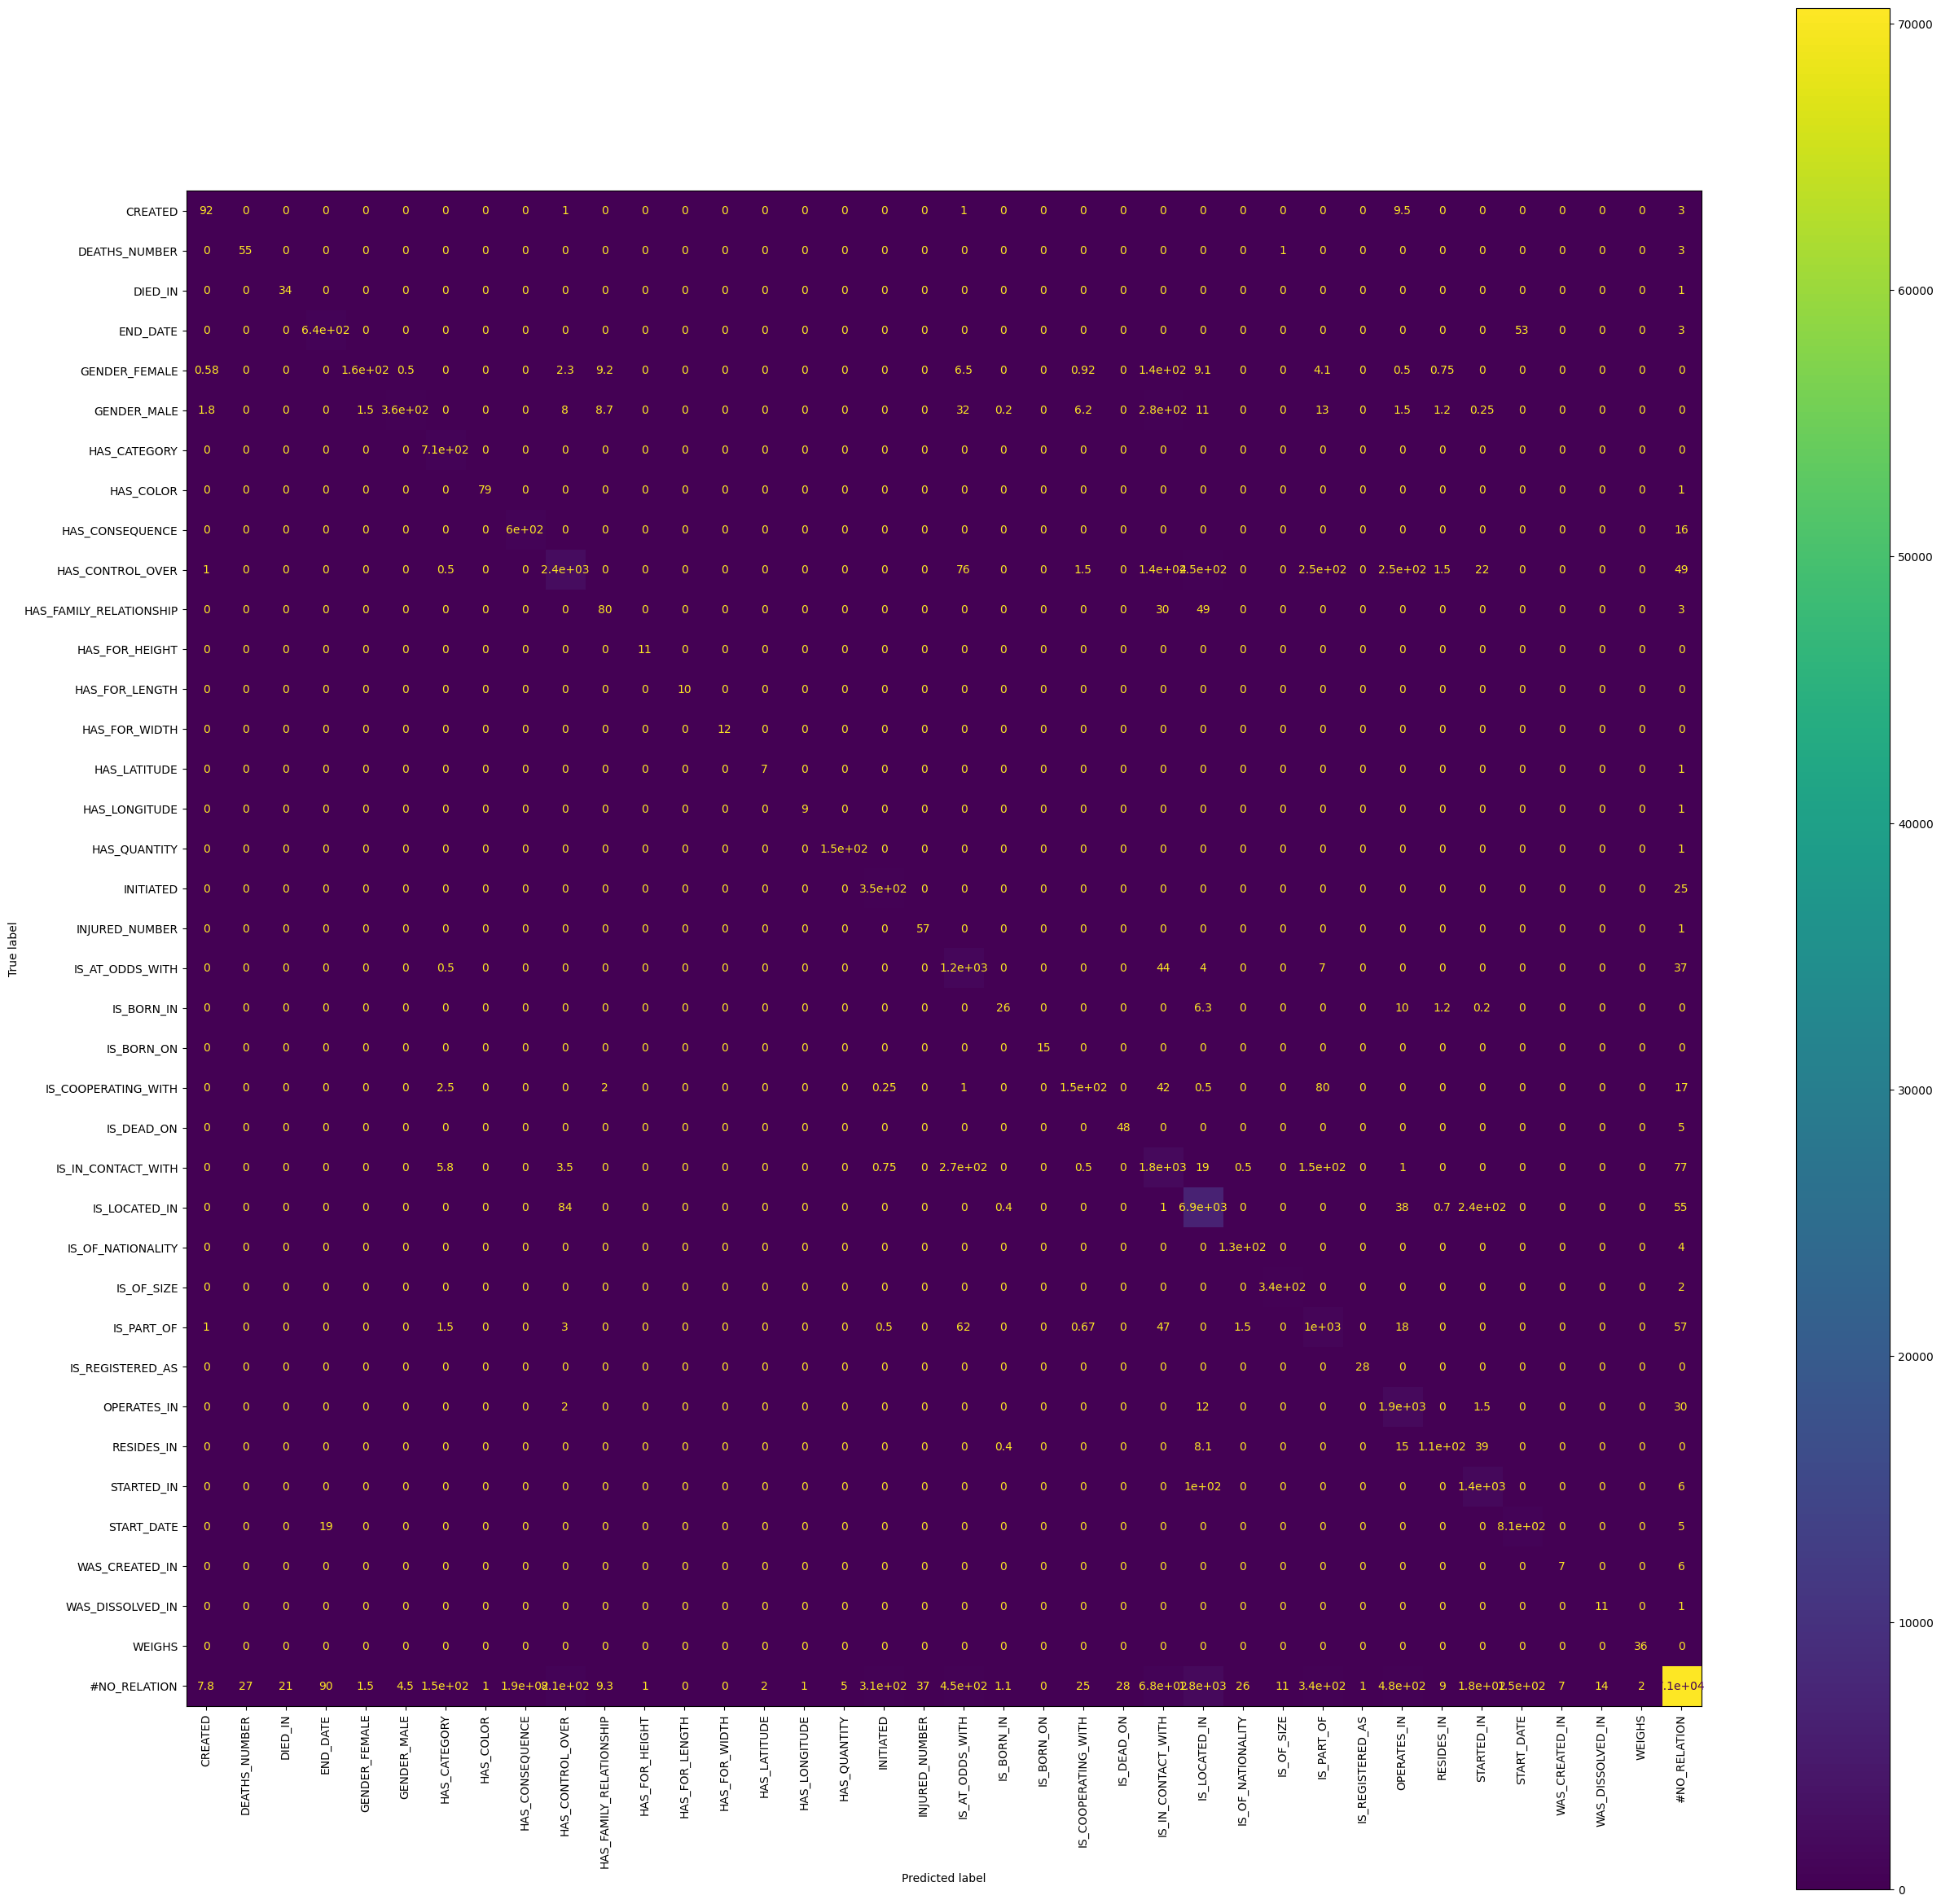

In [45]:
traget_names = ORDERED_CLASSES[1:] # [NO_RELATION_CLASS, WITH_RELATION_CLASS]

conf_mat = confusion_matrix(train_true_df[traget_names].values, train_pred_df[traget_names].values)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat, display_labels=traget_names + [NO_RELATION_CLASS])
fig, ax = plt.subplots(figsize=(30,30))
disp.plot(ax=ax, xticks_rotation = 'vertical')
plt.show()

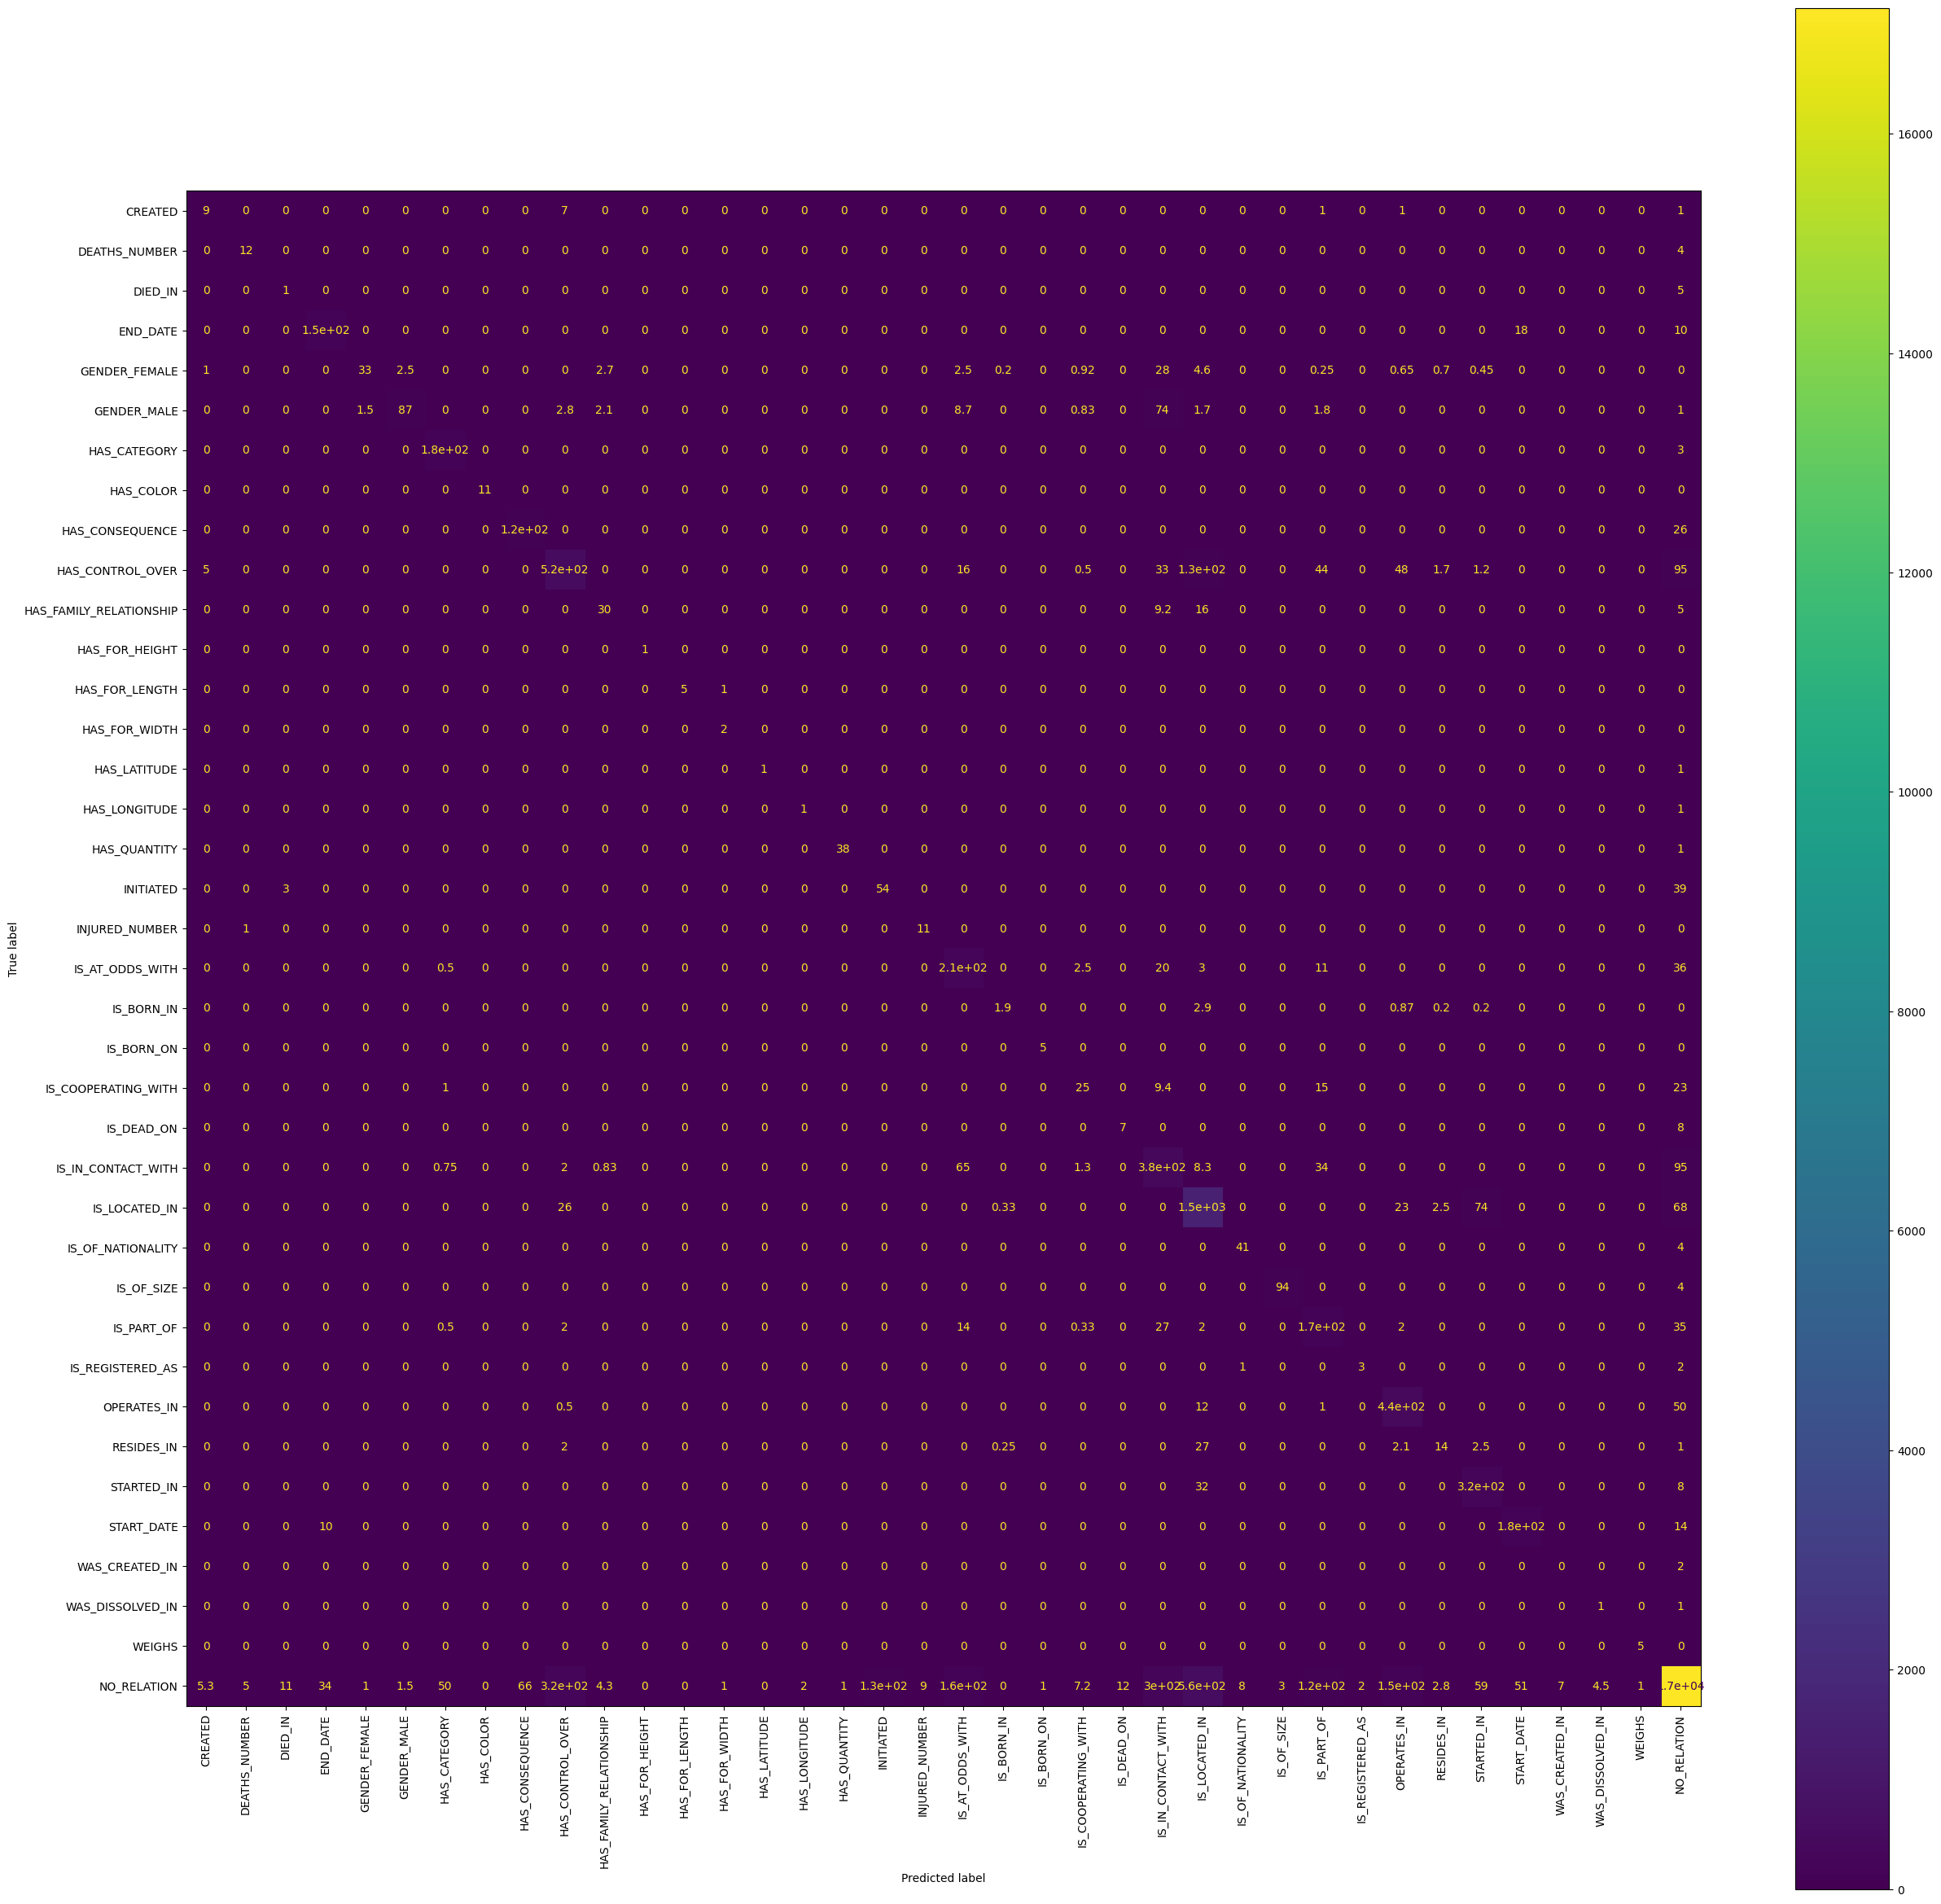

In [50]:
traget_names = ORDERED_CLASSES[1:] # [NO_RELATION_CLASS, WITH_RELATION_CLASS]

conf_mat = confusion_matrix(val_true_df[traget_names].values, val_pred_df[traget_names].values)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat, display_labels=traget_names + ["NO_RELATION"])
fig, ax = plt.subplots(figsize=(30,30))
disp.plot(ax=ax, xticks_rotation = 'vertical')
plt.show()

In [94]:
true_vs_pred_df = pd.concat([val_true_df['GENDER_MALE'].rename("true"), val_pred_df['GENDER_MALE'].rename("pred")], axis=1)
print(true_vs_pred_df.query("pred>0").shape)
true_vs_pred_df.query("true==1. & true!=pred")

(185, 2)


,true,pred
62186,1.0,0.0
74869,1.0,0.0
117276,1.0,0.0
119461,1.0,0.0


In [95]:
"MULTI-LABEL CLASSIFIER PERFORMANCE EVALUATION WITH CONFUSION MATRIX".lower()

'multi-label classifier performance evaluation with confusion matrix'